# ML - Fall 2023 - Practical Homework

## Practical Homework 6 - KMeans and PCA

Student Name:

Student Number:

# Phase 0: Introduction

**In this assignment, you will develop K-means and PCA algorithm to perform data segmentation. The dataset contains behavioral variables of customers such as Balance, Purchases, etc. Your task is to make a model to segment the same customers into the clusters.**

In [1]:
# essential packages 
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn.model_selection import train_test_split
from sklearn import metrics

import warnings
warnings.filterwarnings("ignore") 

# add any other packages that you may need here

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
!wget -O https://www.dropbox.com/scl/fi/vcejtazdshv8dnhbnfxc7/dataset.csv?rlkey=zauavuzjf5jzmdoqtorkmrkzk&dl=1

# Phase 1: Explore

## Sec 1: Load and Explore the given dataset (P1-Sec1: 25 Points)

Load the dataset and display the first 10 rows of dataset. **(P1-1-1: 2 points)**

In [3]:
path = '/kaggle/input/market-segmentation-in-insurance-unsupervised/Customer Data.csv'
df = pd.read_csv(path)
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


Print the column names and number of data samples. **(P1-1-2: 1 points)**

In [4]:
print("Column Names:", df.columns.tolist())
print("Number of Data Samples:", len(df))

Column Names: ['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']
Number of Data Samples: 8950


Identify the columns that contain nan values. **(P1-1-3: 2 points)**

In [5]:
nan_columns = df.columns[df.isna().any()].tolist()
print("Columns with NaN values:", nan_columns)

Columns with NaN values: ['CREDIT_LIMIT', 'MINIMUM_PAYMENTS']


Fill the nan values with the median of each column. **(P1-1-4: 2 points)**

In [6]:
for column in nan_columns:
    df[column].fillna(df[column].median(), inplace=True)

Find the max, min, and average of each column with numerical data. **(P1-1-5: 2 points)**

In [7]:
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print("Max, Min, Average of each numerical column:")
for col in numerical_cols:
    print(f"{col} - Max: {df[col].max()}, Min: {df[col].min()}, Average: {df[col].mean()}")

Max, Min, Average of each numerical column:
BALANCE - Max: 19043.13856, Min: 0.0, Average: 1564.4748276781006
BALANCE_FREQUENCY - Max: 1.0, Min: 0.0, Average: 0.8772707255865921
PURCHASES - Max: 49039.57, Min: 0.0, Average: 1003.2048335195531
ONEOFF_PURCHASES - Max: 40761.25, Min: 0.0, Average: 592.4373709497207
INSTALLMENTS_PURCHASES - Max: 22500.0, Min: 0.0, Average: 411.0676446927374
CASH_ADVANCE - Max: 47137.21176, Min: 0.0, Average: 978.8711124654749
PURCHASES_FREQUENCY - Max: 1.0, Min: 0.0, Average: 0.49035054837988823
ONEOFF_PURCHASES_FREQUENCY - Max: 1.0, Min: 0.0, Average: 0.202457683575419
PURCHASES_INSTALLMENTS_FREQUENCY - Max: 1.0, Min: 0.0, Average: 0.3644373415642458
CASH_ADVANCE_FREQUENCY - Max: 1.5, Min: 0.0, Average: 0.13514420033519556
CASH_ADVANCE_TRX - Max: 123, Min: 0, Average: 3.2488268156424582
PURCHASES_TRX - Max: 358, Min: 0, Average: 14.709832402234637
CREDIT_LIMIT - Max: 30000.0, Min: 50.0, Average: 4494.282472772402
PAYMENTS - Max: 50721.48336, Min: 0.0, Ave

Plot the Histogram of each column with numerical data. Also, show the median and average value of each column in plot. **(P1-1-6: 6 points)**

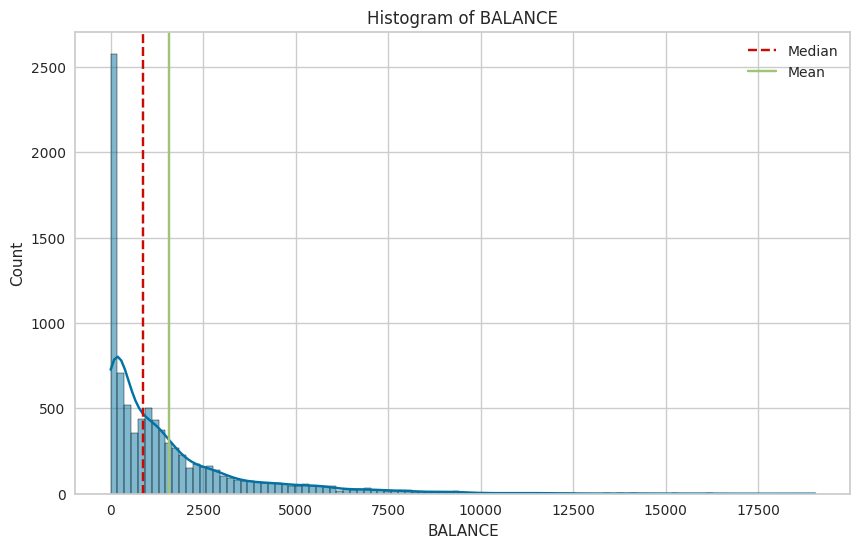

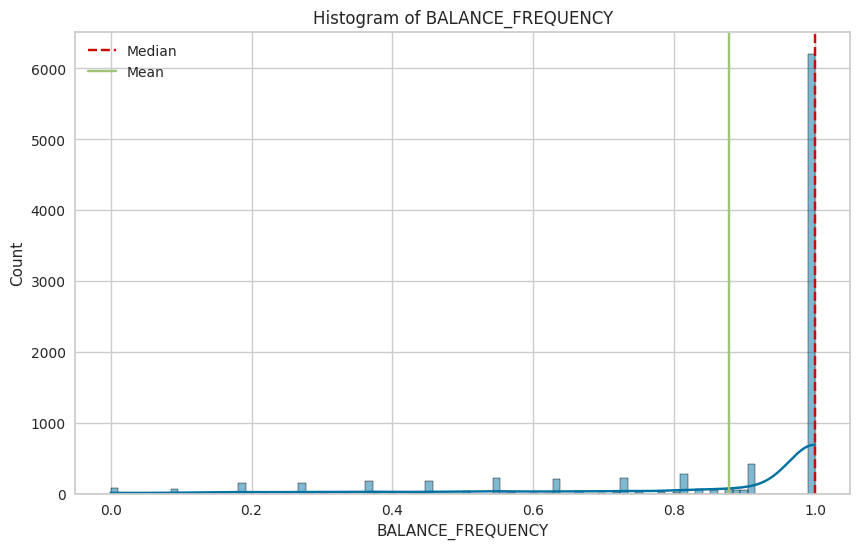

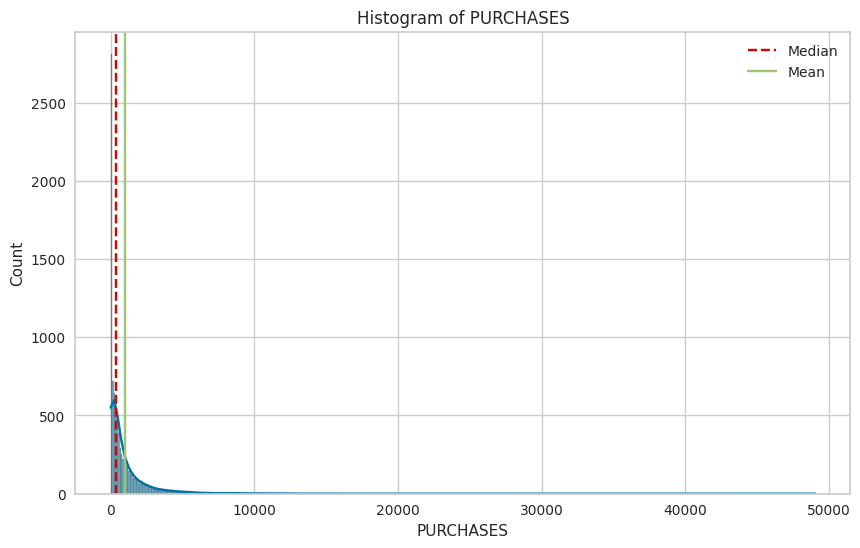

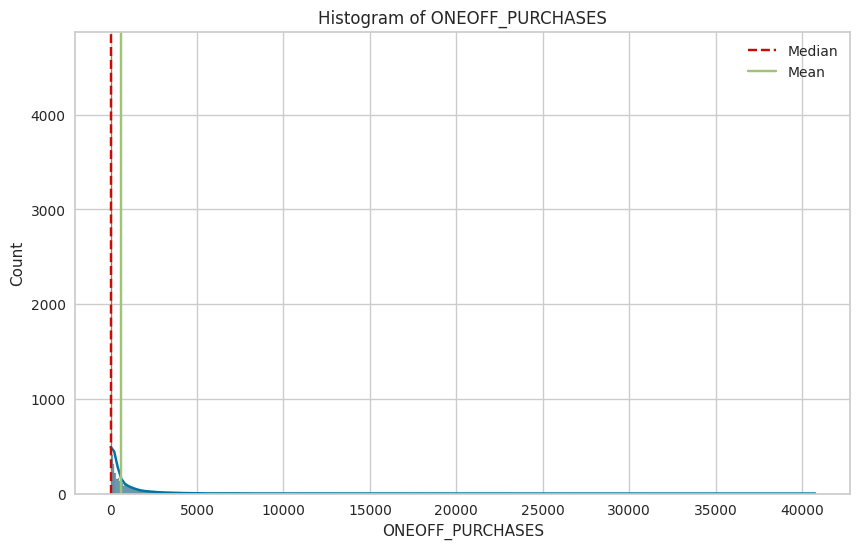

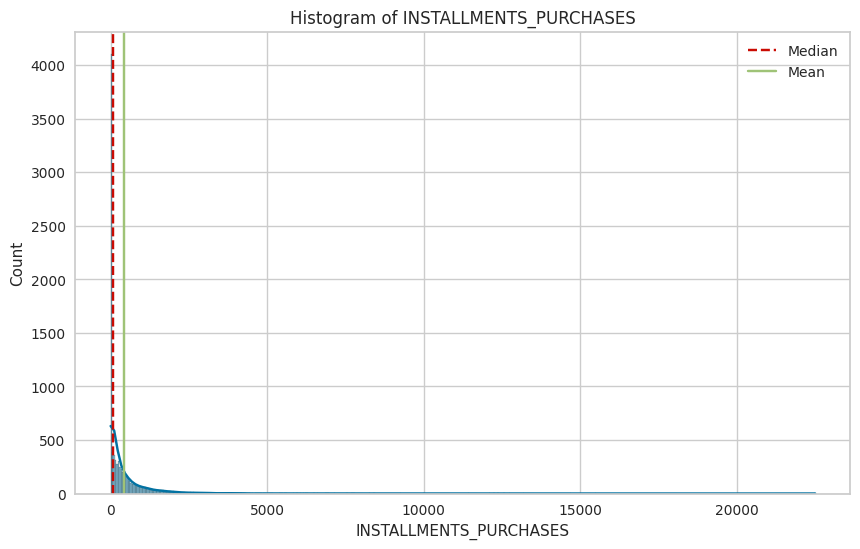

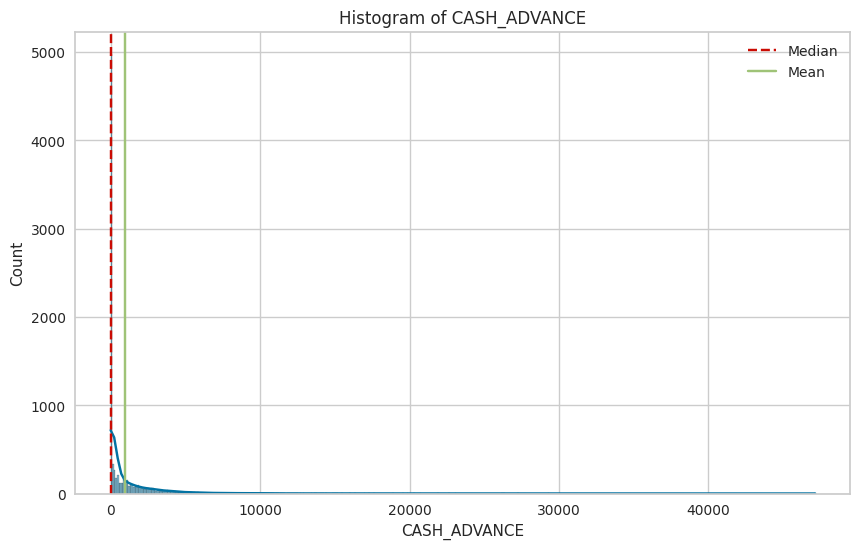

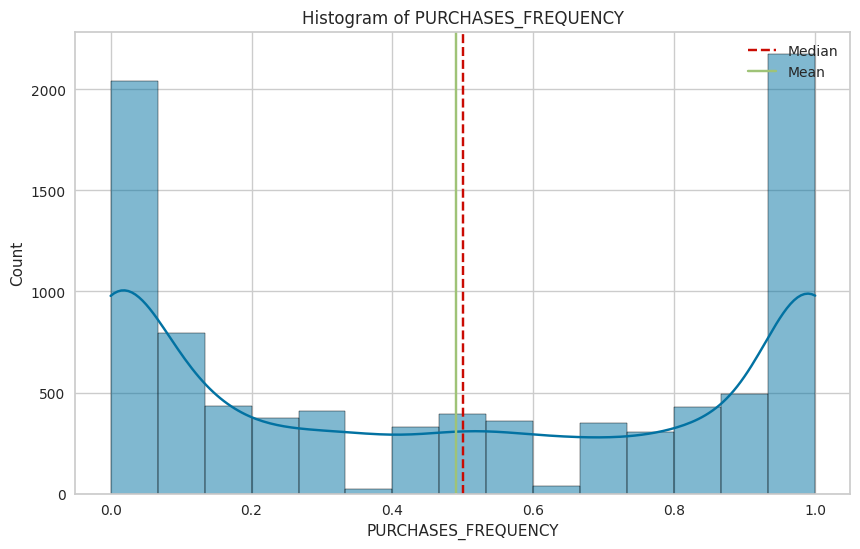

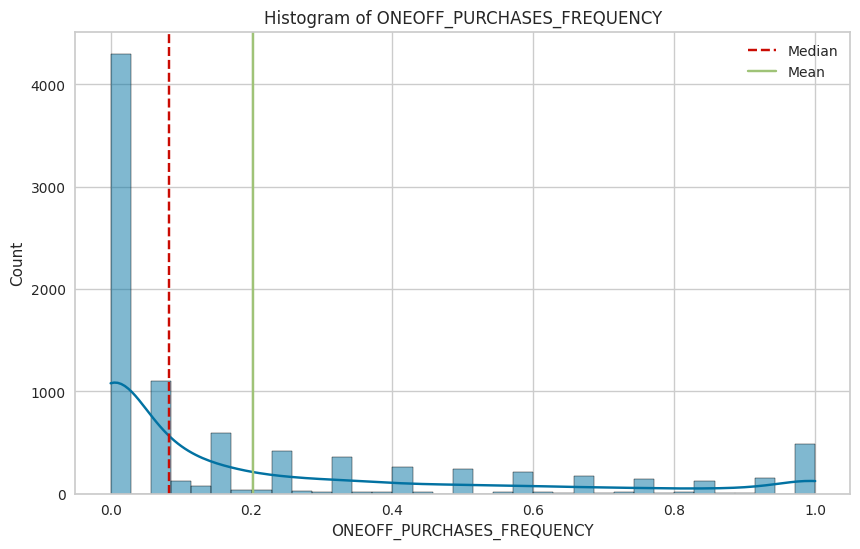

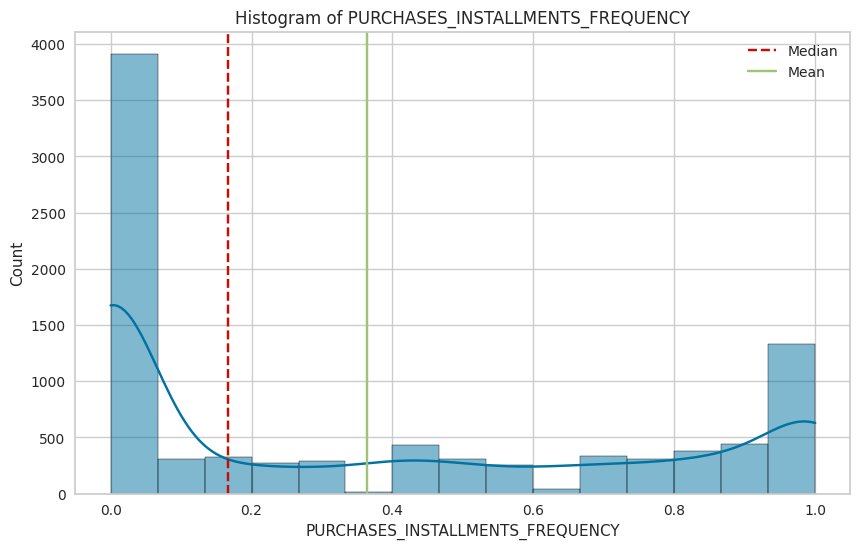

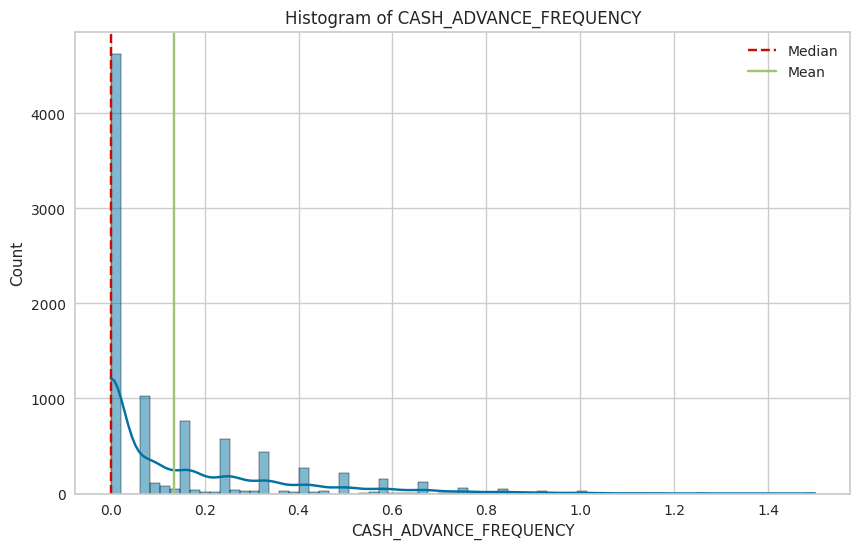

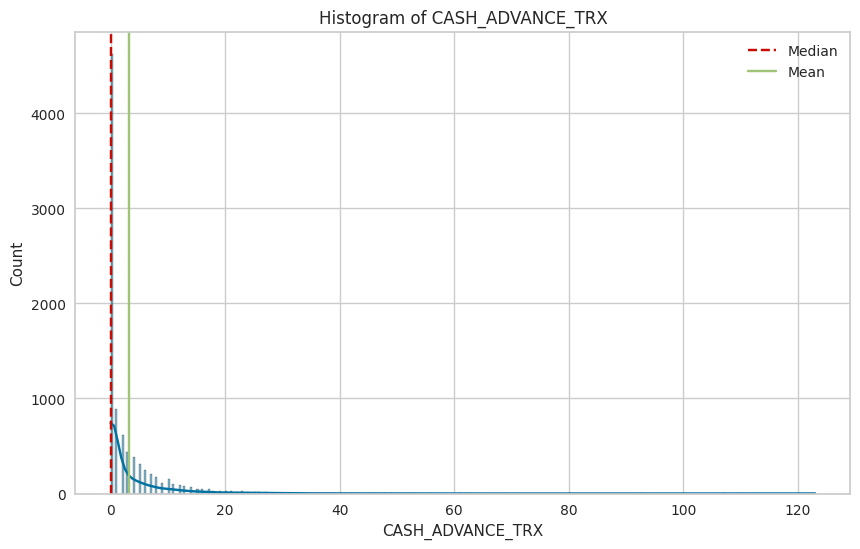

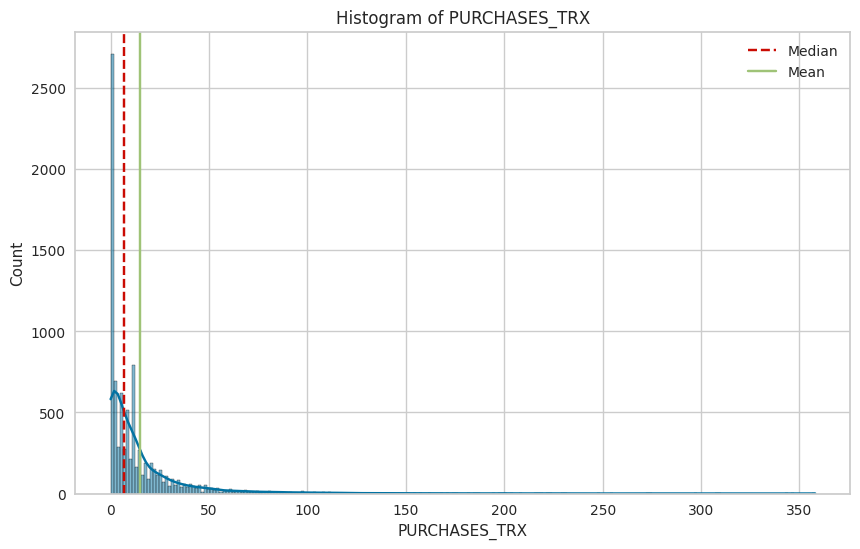

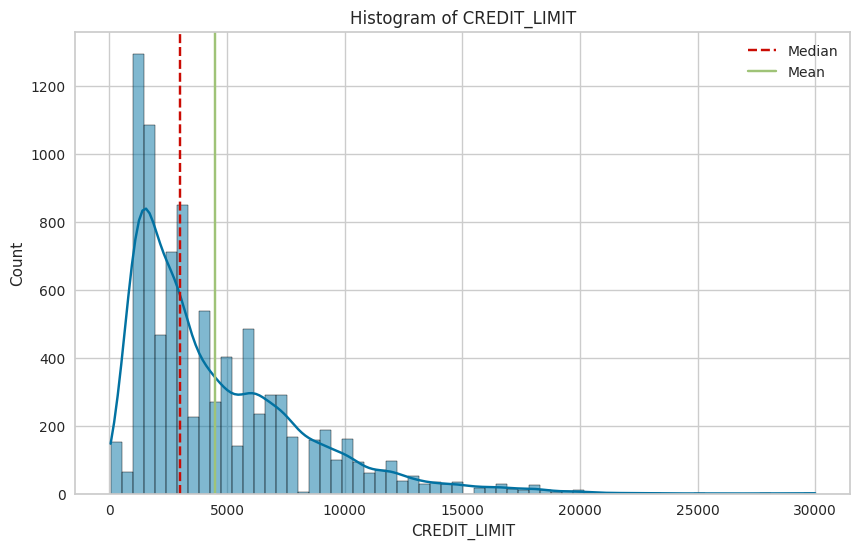

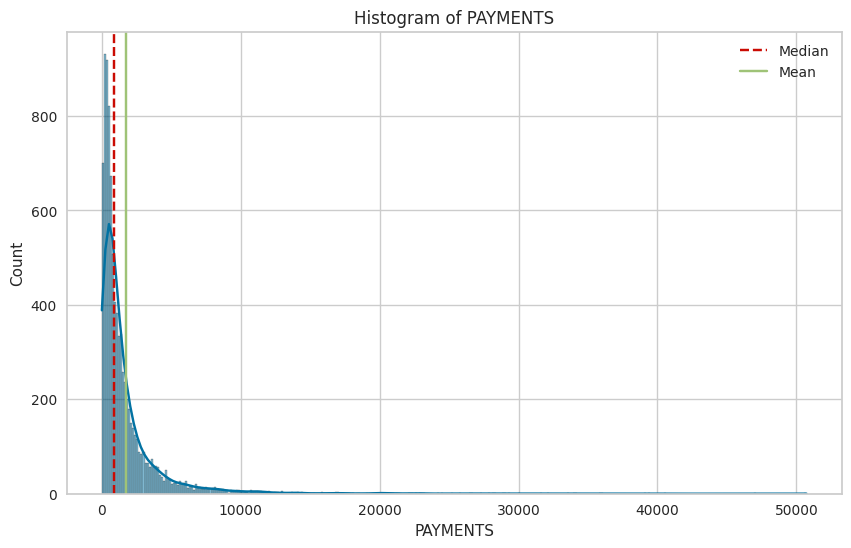

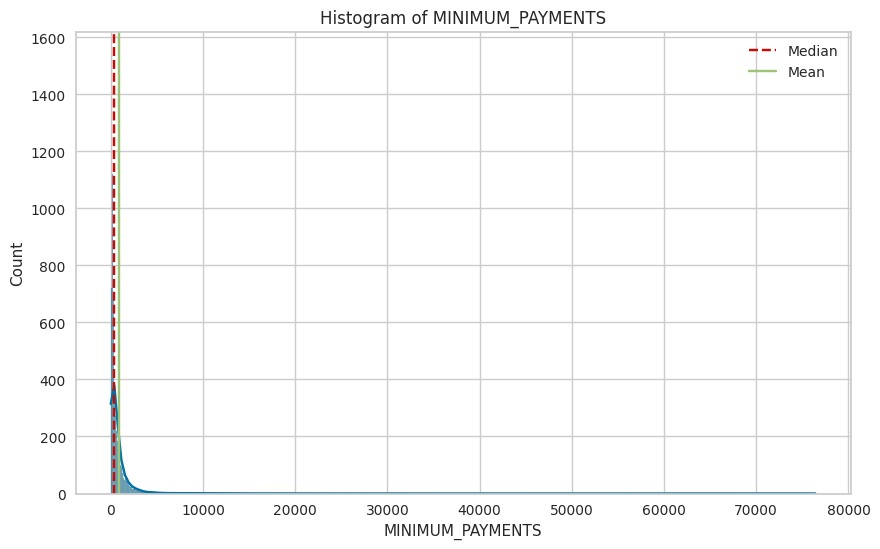

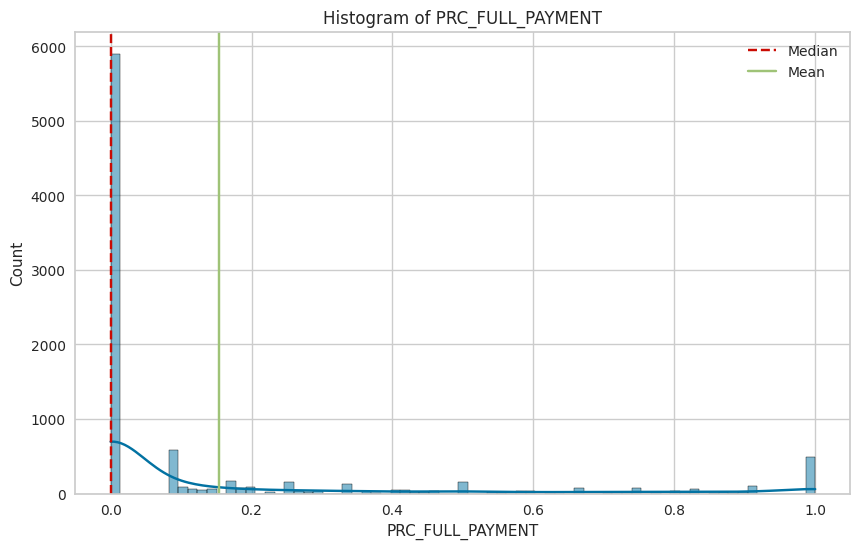

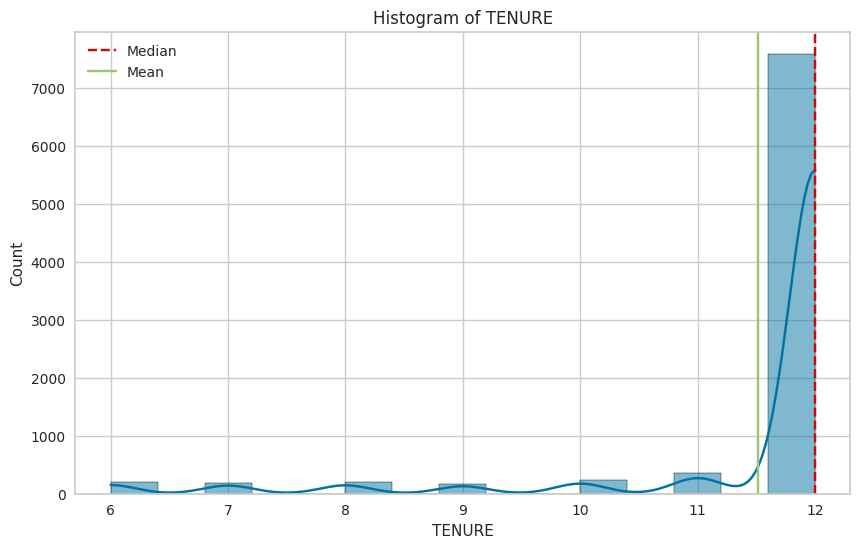

In [8]:
for col in numerical_cols:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[col], kde=True)
    plt.axvline(x=df[col].median(), color='r', linestyle='--', label="Median")
    plt.axvline(x=df[col].mean(), color='g', linestyle='-', label="Mean")
    plt.title(f'Histogram of {col}')
    plt.legend()
    plt.show()

Display the box plot for each numerical column. **(P1-1-7: 5 points)**

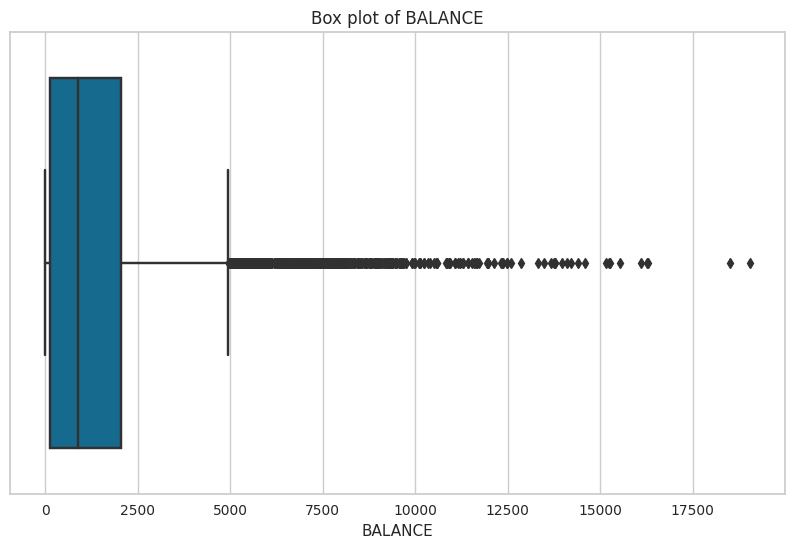

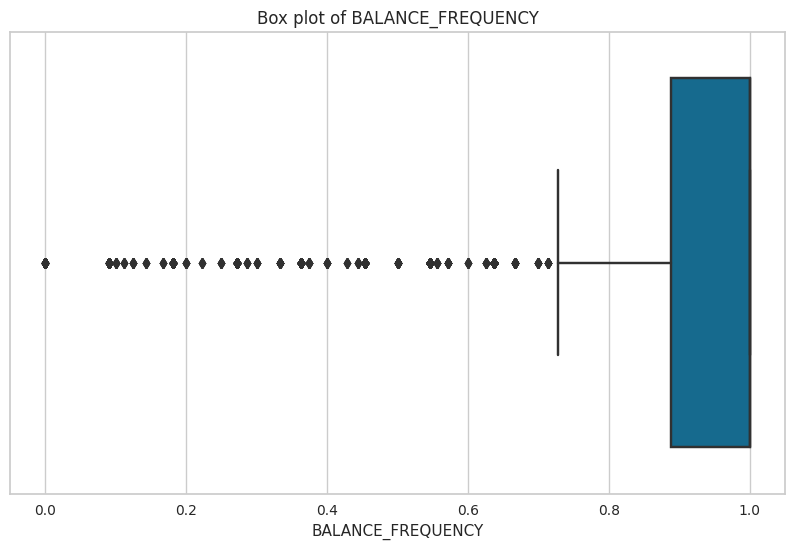

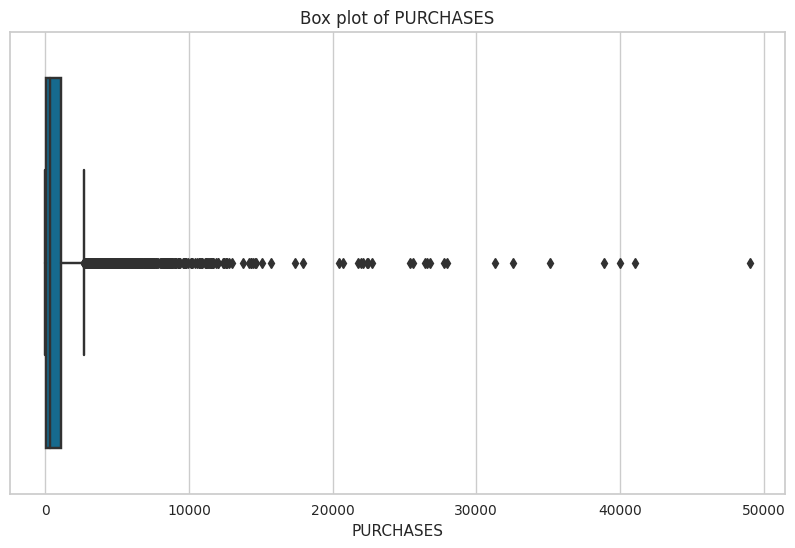

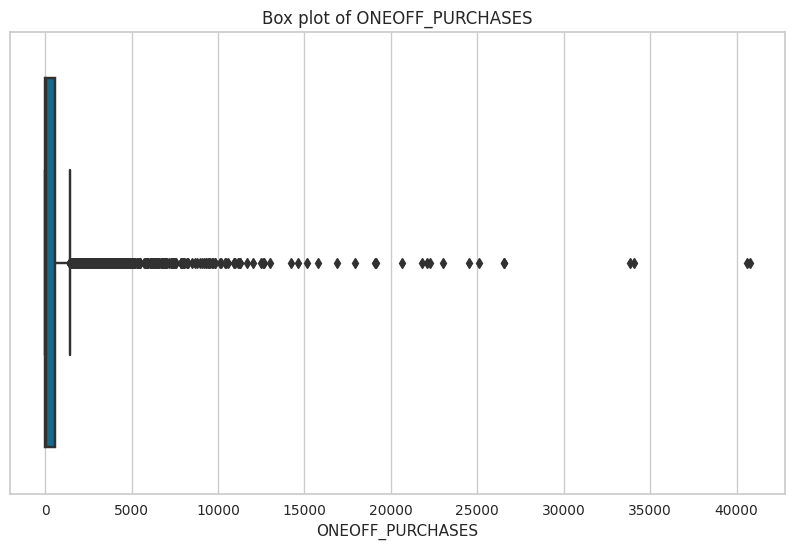

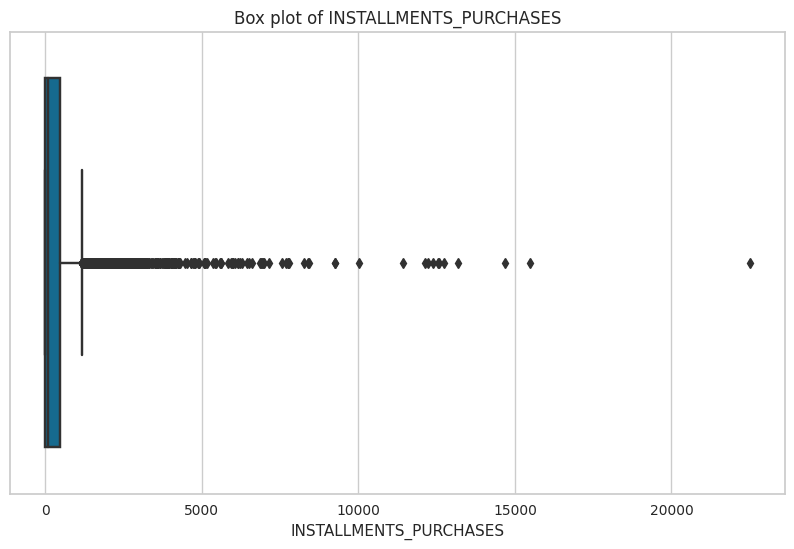

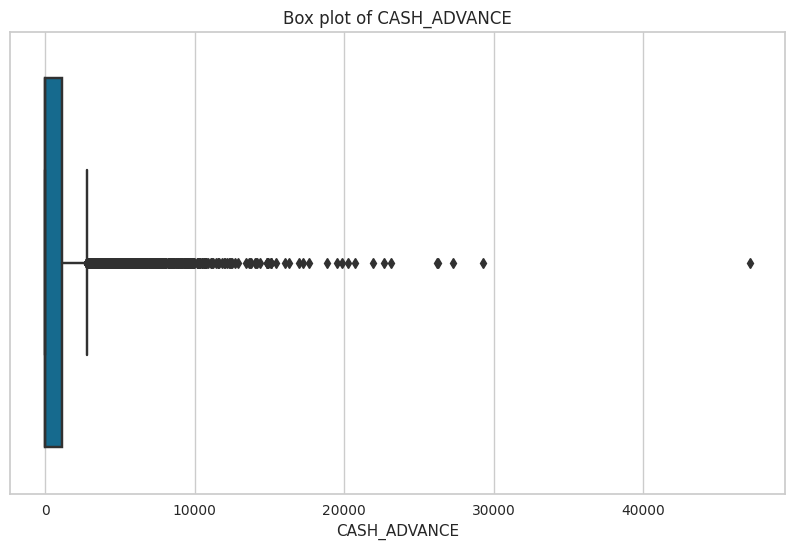

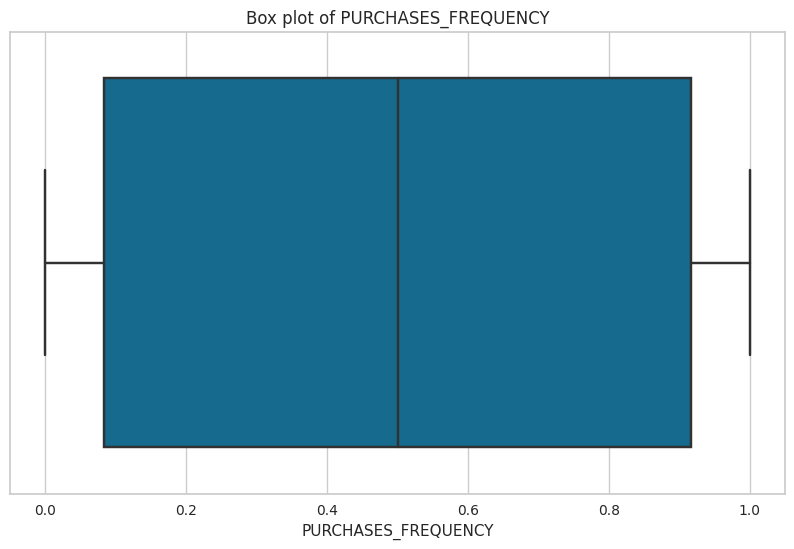

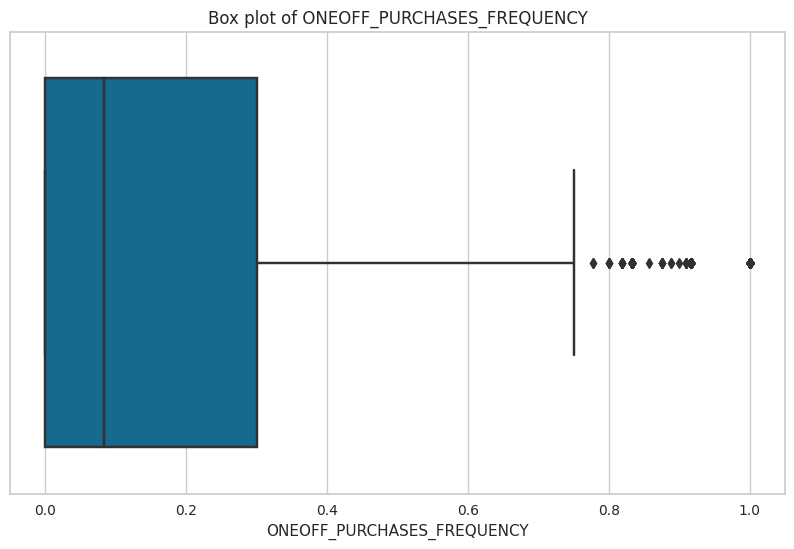

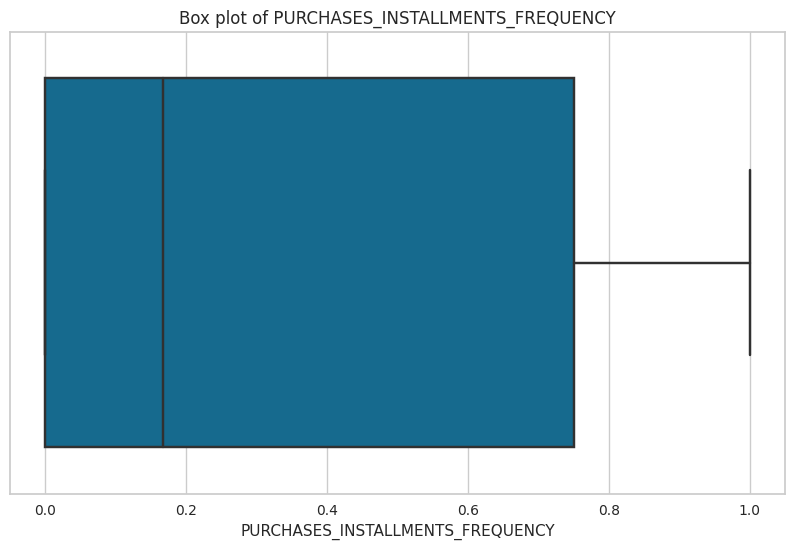

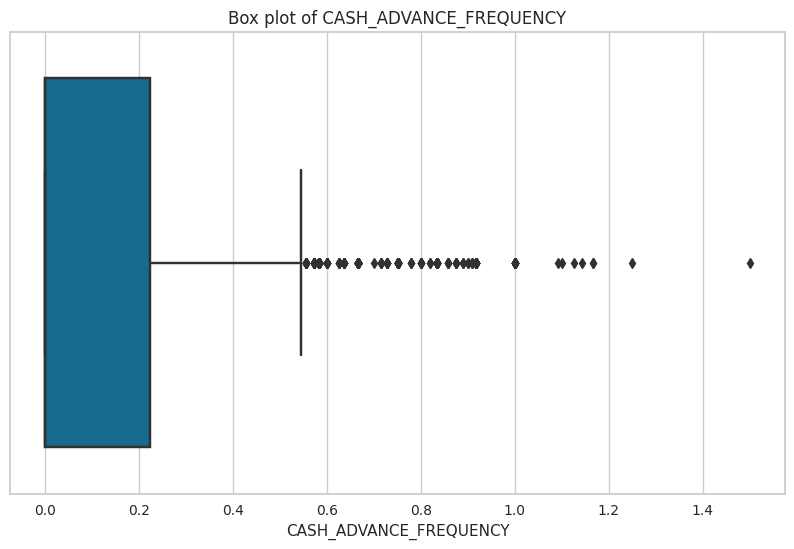

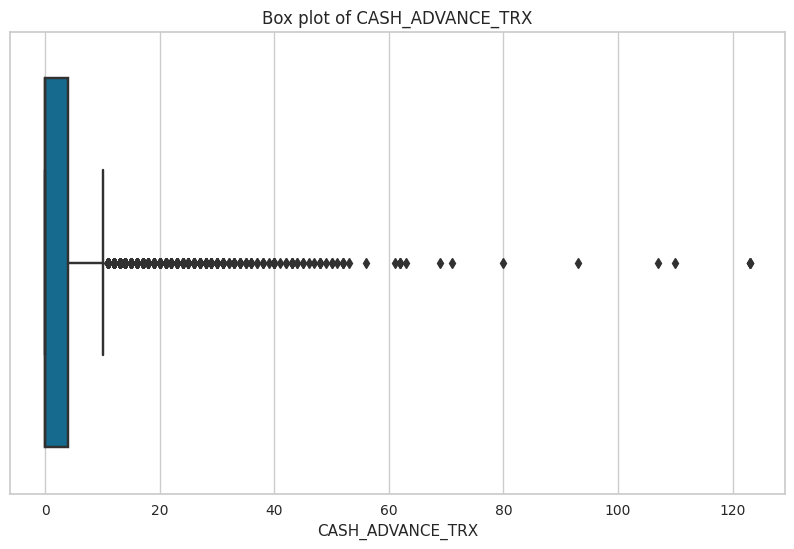

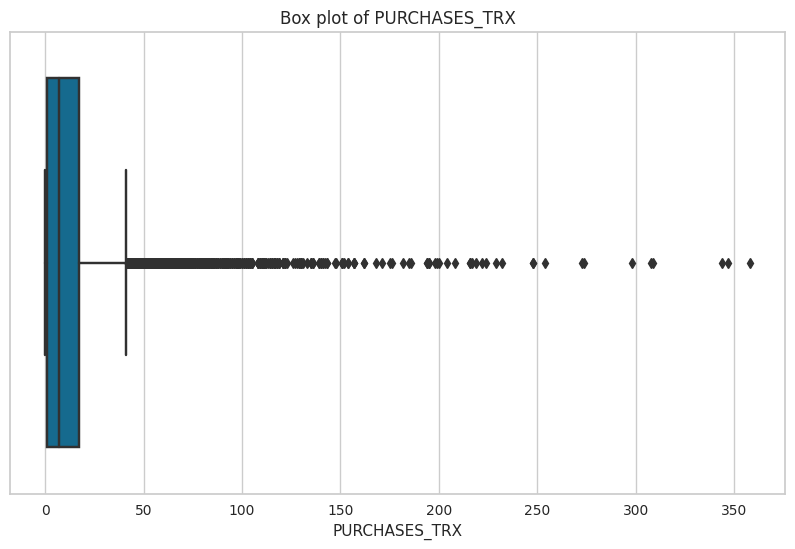

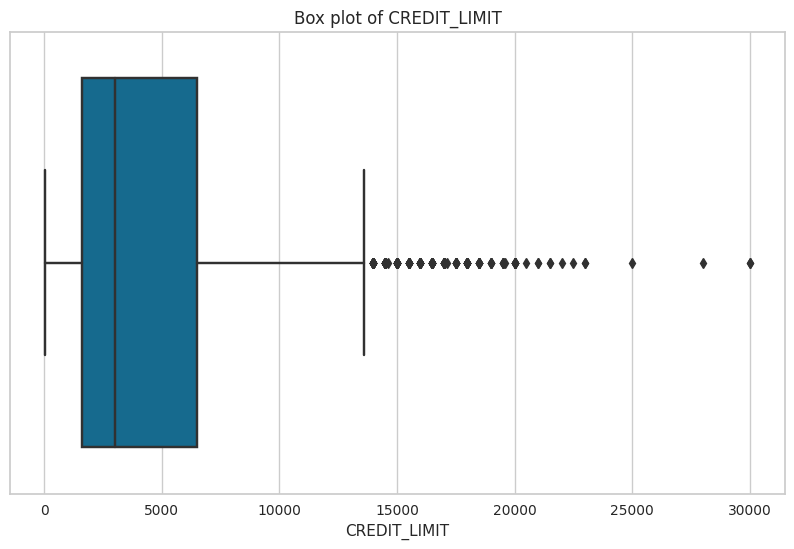

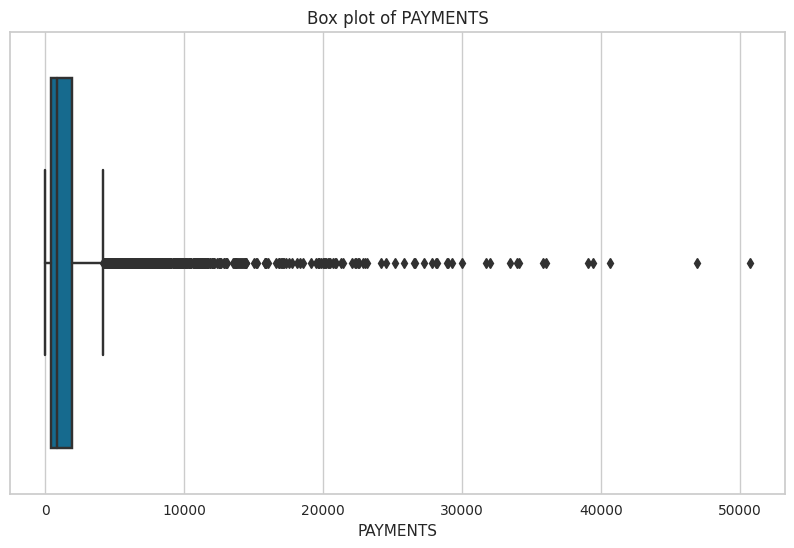

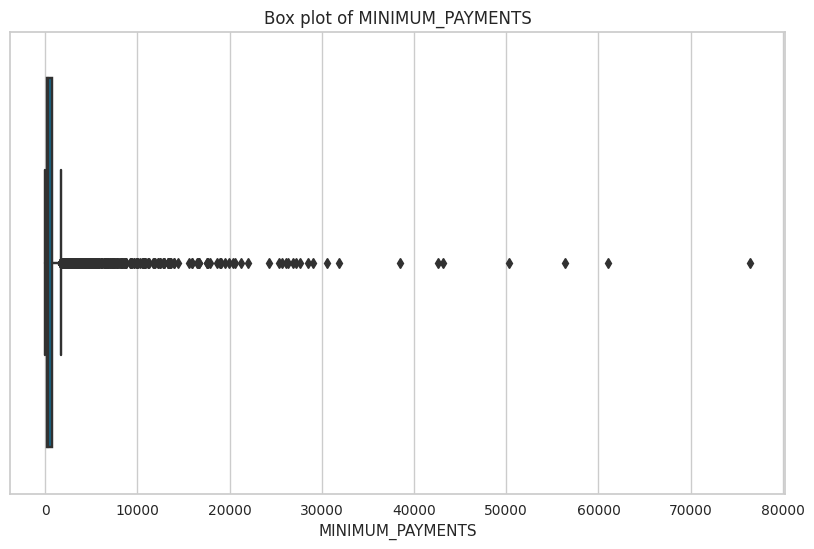

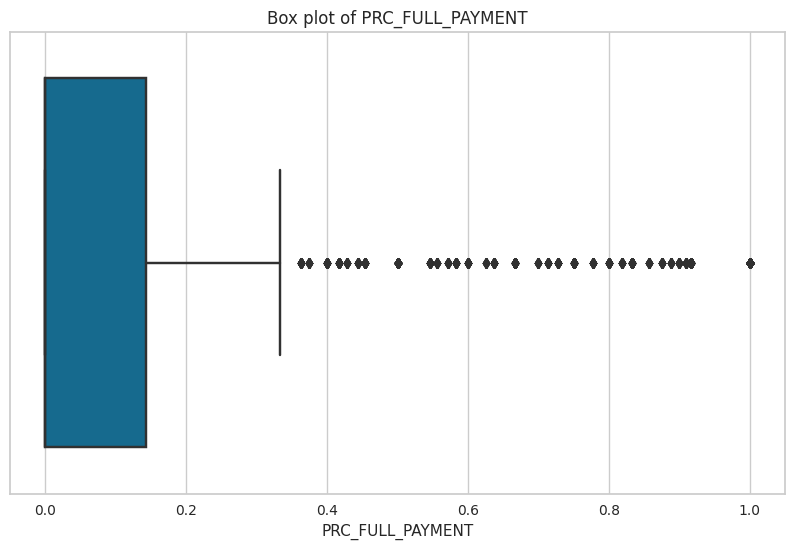

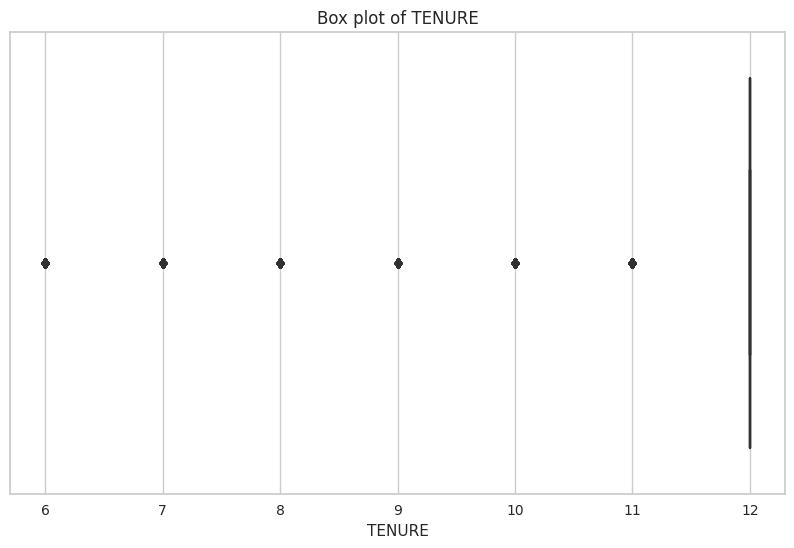

In [9]:
for col in numerical_cols:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[col])
    plt.title(f'Box plot of {col}')
    plt.show()

Show the correlation between columns by plotting the heatmap of correlation coefficients. **(P1-1-8: 5 points)**

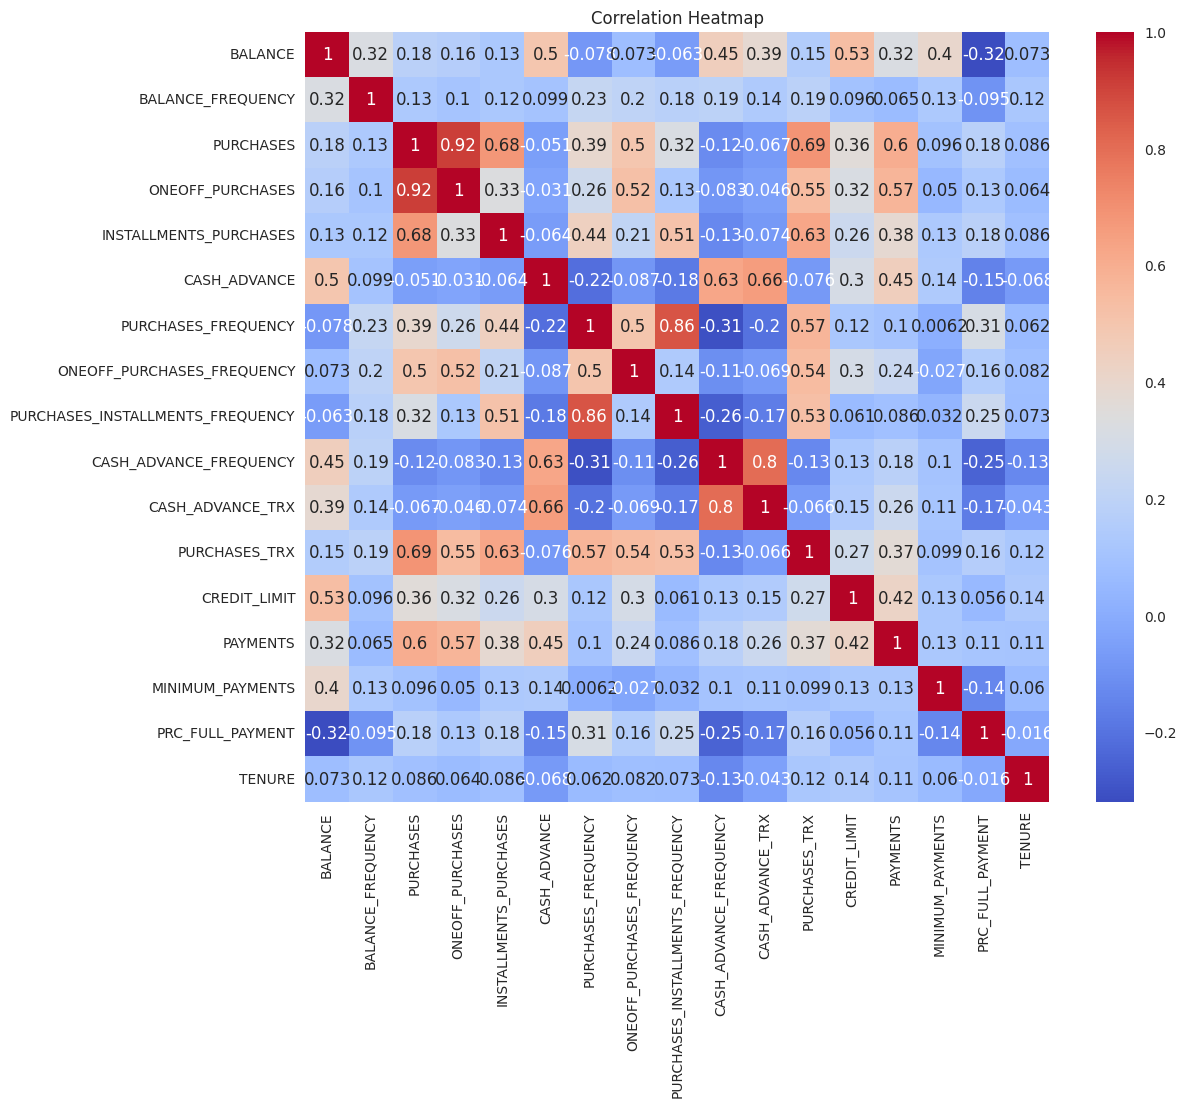

In [10]:
plt.figure(figsize=(12, 10))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Phase 2: Preprocessing

## Sec 1: Preprocess the data **(P2-Sec1: 15 Points)**

drop the 'CUST_ID' column. **(P2-1-1: 2 points)**

In [11]:
df.drop(columns=['CUST_ID'], inplace=True)

Check for duplicated rows. If there is any duplicated row, remove them. **(P2-1-2: 6 points)**

In [12]:
duplicates = df.duplicated().sum()
print(f"Number of duplicated rows: {duplicates}")
df = df.drop_duplicates()

Number of duplicated rows: 0


Normalize the values of each column. **(P2-1-3: 7 points)**

In [13]:
scaler = StandardScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.731989,-0.249434,-0.424900,-0.356934,-0.349079,-0.466786,-0.806490,-0.678661,-0.707313,-0.675349,-0.476070,-0.511333,-0.960378,-0.528979,-0.302400,-0.525551,0.36068
1,0.786961,0.134325,-0.469552,-0.356934,-0.454576,2.605605,-1.221758,-0.678661,-0.916995,0.573963,0.110074,-0.591796,0.688678,0.818642,0.097500,0.234227,0.36068
2,0.447135,0.518084,-0.107668,0.108889,-0.454576,-0.466786,1.269843,2.673451,-0.916995,-0.675349,-0.476070,-0.109020,0.826100,-0.383805,-0.093293,-0.525551,0.36068
3,0.049099,-1.016953,0.232058,0.546189,-0.454576,-0.368653,-1.014125,-0.399319,-0.916995,-0.258913,-0.329534,-0.551565,0.826100,-0.598688,-0.228307,-0.525551,0.36068
4,-0.358775,0.518084,-0.462063,-0.347294,-0.454576,-0.466786,-1.014125,-0.399319,-0.916995,-0.675349,-0.476070,-0.551565,-0.905410,-0.364368,-0.257266,-0.525551,0.36068


# Phase 3: Modeling

## Sec 1: PCA and K-means with sklearn **(P3-Sec1: 40 Points)**

Use the `PCA` class from the `sklearn` library to reduce the dimensionality of the DataFrame. **(P3-1-1: 2 points)**

Follow [this link](https://www.youtube.com/watch?v=nEvKduLXFvk) to understand more about PCA (2 minutes).

In [14]:
n_components = 2
pca = PCA(n_components=n_components)
df_pca = pca.fit_transform(df)
df_pca = pd.DataFrame(df_pca, columns=[f'PC{i+1}' for i in range(n_components)])

**Elbow Method Visualization** helps to determine the optimal number of clusters by visualizing the within-cluster sum of squares (WCSS) against the number of clusters.

Use the `plot_elbow_method function` to plot the number of clusters versus WCSS for both the main DataFrame and the one reduced using `PCA`. Then Discuss the choice of the number of components for PCA and clusters for K-means. **(P3-1-2: 10 points)**

In [15]:
def plot_elbow_method(X, max_clusters=10):
    wcss = []
    for i in range(1, max_clusters + 1):
        kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
        kmeans.fit(X)
        wcss.append(kmeans.inertia_)
    
    plt.plot(range(1, max_clusters + 1), wcss)
    plt.title('Elbow Method')
    plt.xlabel('Number of clusters')
    plt.ylabel('WCSS')
    plt.show()

Elbow Method for Original DataFrame:


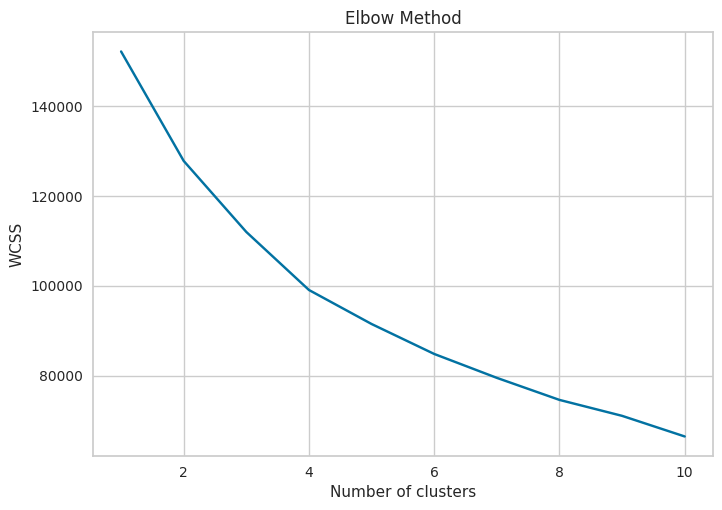

Elbow Method for PCA-Reduced DataFrame:


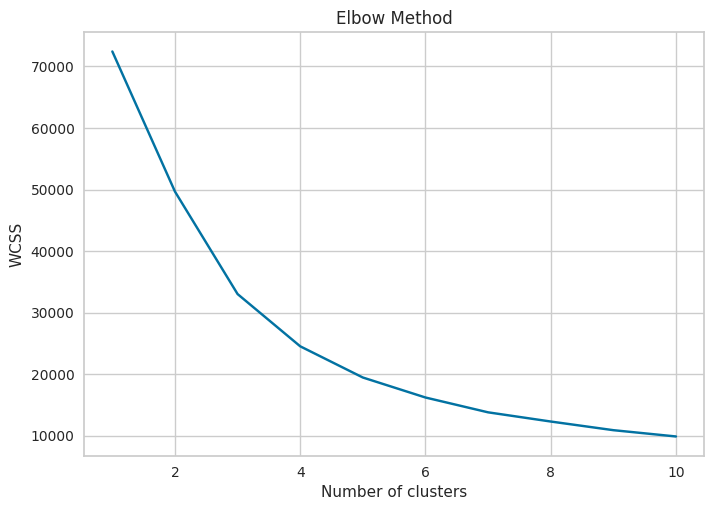

In [16]:
print("Elbow Method for Original DataFrame:")
plot_elbow_method(df)
print("Elbow Method for PCA-Reduced DataFrame:")
plot_elbow_method(df_pca)

Use the `KMeans` class from the `sklearn.cluster` module to create clusters from the DataFrame that has been dimensionally reduced using `PCA`. **(P3-1-3: 3 points)**

Follow [this link](https://www.youtube.com/watch?v=R2e3Ls9H_fc) to understand more about KMeans (4 minutes).

In [17]:
k = 3
kmeans_pca = KMeans(n_clusters=k, init='k-means++', random_state=42)
clusters_pca = kmeans_pca.fit_predict(df_pca)
df_pca['Cluster'] = clusters_pca

Complete the definition of the following class to implement PCA, which is capable of reducing the dimensionality. **(P3-1-4: 10 points)**

In [18]:
class CustomPCA:
    def __init__(self, n_components):
        self.n_components = n_components
        self.components = None
        self.mean = None

    def fit(self, X):
        self.mean = np.mean(X, axis=0)
        X_centered = X - self.mean
        U, S, Vt = np.linalg.svd(X_centered, full_matrices=False)
        self.components = Vt[:self.n_components]

    def transform(self, X):
        X_centered = X - self.mean
        X_transformed = np.dot(X_centered, self.components.T)
        return X_transformed

Complete defining the class below to implement `KMeans`, an algorithm designed for clustering. **(P3-1-5: 15 points)**

In [19]:
class CustomKMeans:
    def __init__(self, n_clusters, max_iter=300, tol=0.0001):
        self.n_clusters = n_clusters
        self.centroids = None
        self.max_iter = max_iter
        self.tol = tol

    def initialize_centroids(self, X):
        centroids = [X[np.random.randint(X.shape[0])]]
        for _ in range(1, self.n_clusters):
            centroids_array = np.array(centroids)
            distances = np.sqrt(((X - centroids_array[:, np.newaxis])**2).sum(axis=2))
            min_distances = np.min(distances, axis=0)
            probabilities = min_distances / min_distances.sum()
            cumulative_probabilities = np.cumsum(probabilities)
            r = np.random.rand()
            for j, p in enumerate(cumulative_probabilities):
                if r < p:
                    centroids.append(X[j])
                    break
        return np.array(centroids)

    def fit_predict(self, X):
        self.centroids = self.initialize_centroids(X)
        for _ in range(self.max_iter):
            distances = np.sqrt(((X - self.centroids[:, np.newaxis])**2).sum(axis=2))
            labels = np.argmin(distances, axis=0)
            new_centroids = np.array([X[labels == i].mean(axis=0) if np.any(labels == i) else self.centroids[i] 
                                      for i in range(self.n_clusters)])
            if np.all(np.abs(new_centroids - self.centroids) <= self.tol):
                break
            self.centroids = new_centroids
        return labels

## Sec 2: Fitting implemented Kmeans **(P3-Sec2: 5 Points)**

Use your implemented `CustomPCA` to reduce the dimensionality of the DataFrame. **(P3-2-1: 3 points)**

In [20]:
n_components_pca = 2
pca = CustomPCA(n_components=n_components_pca)
pca.fit(df.values)
transformed_data = pca.transform(df.values)

Apply the `CustomKMeans` implementation you created to perform clustering on the DataFrame. **(P3-2-2: 2 points)**

In [21]:
n_clusters = 3
custom_kmeans = CustomKMeans(n_clusters=n_clusters)
cluster_labels = custom_kmeans.fit_predict(transformed_data)

# Phase 4: Analyzing

## Sec 1: Visualizing and Comparing **(P4-Sec1: 5 Points)**

Visualize and compare the clustering results from the sklearn library with those from your custom clustering implementation. **(P4-1-1: 5 points)**

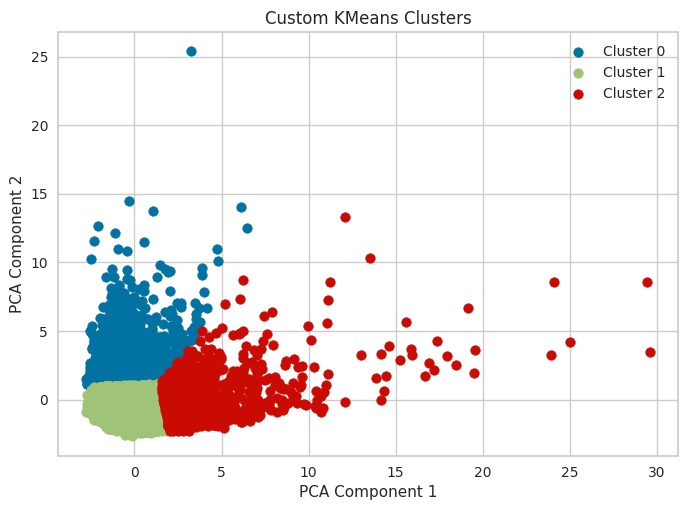

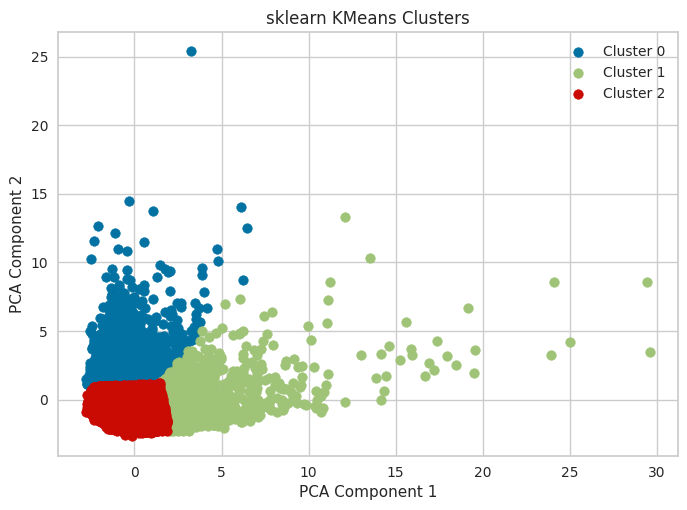

In [22]:
def plot_clusters(X, labels, title):
    unique_labels = set(labels)
    for label in unique_labels:
        plt.scatter(X[labels == label, 0], X[labels == label, 1], label=f'Cluster {label}')
    plt.title(title)
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.legend()
    plt.show()

plot_clusters(transformed_data, cluster_labels, 'Custom KMeans Clusters')
plot_clusters(transformed_data, clusters_pca, 'sklearn KMeans Clusters')

## Sec 2: Silhouette Analysis **(P4-Sec2: 10 Points)**

**Silhouette Analysis** involves calculating and plotting the silhouette coefficients, which measure how similar each point is to its own cluster compared to other clusters. The closer these coefficients are to +1, the better the clustering.
# Plot for sklearn KMeans
Calculate the silhouette scores for each sample in the dataset using `silhouette_samples` and the average silhouette score using `silhouette_score`. Then, visualize these scores in a plot for each cluster for both results from the sklearn library and those from your custom clustering implementation.  **(P4-2-1: 10 points)**

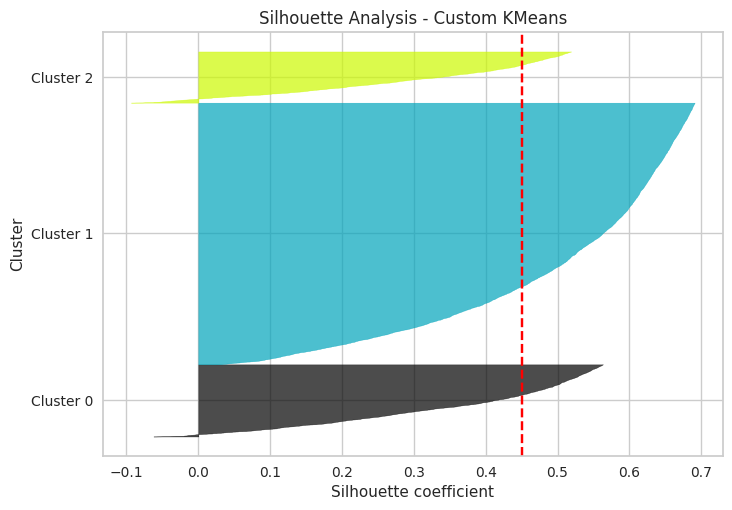

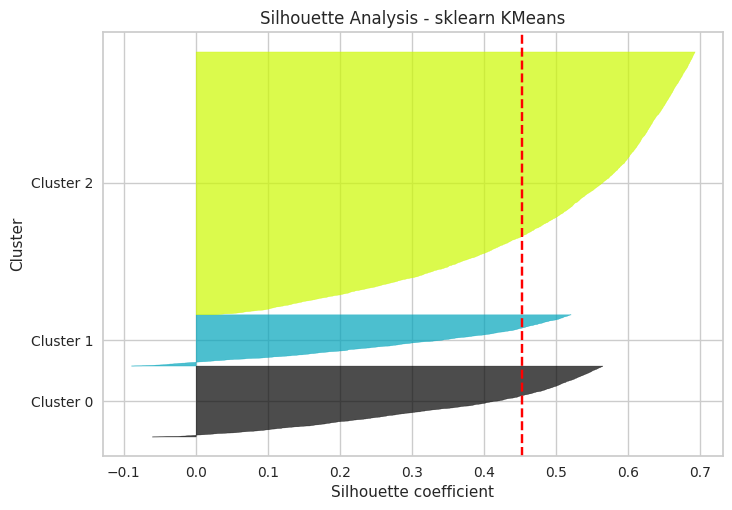

In [23]:
import matplotlib.cm as cm
silhouette_vals_custom = silhouette_samples(transformed_data, cluster_labels)
silhouette_avg_custom = silhouette_score(transformed_data, cluster_labels)
silhouette_vals_sklearn = silhouette_samples(transformed_data, clusters_pca)
silhouette_avg_sklearn = silhouette_score(transformed_data, clusters_pca)
def plot_silhouette_analysis(X, cluster_labels, silhouette_vals, silhouette_avg, title):
    n_clusters = len(set(cluster_labels))
    y_lower, y_upper = 0, 0
    yticks = []
    for i, c in enumerate(set(cluster_labels)):
        c_silhouette_vals = silhouette_vals[cluster_labels == c]
        c_silhouette_vals.sort()
        y_upper += len(c_silhouette_vals)
        color = cm.nipy_spectral(float(i) / n_clusters)
        plt.fill_betweenx(np.arange(y_lower, y_upper), 0, c_silhouette_vals, facecolor=color, edgecolor=color, alpha=0.7)
        yticks.append((y_lower + y_upper) / 2)
        y_lower = y_upper

    plt.axvline(x=silhouette_avg, color="red", linestyle="--")
    plt.yticks(yticks, [f'Cluster {c}' for c in set(cluster_labels)])
    plt.ylabel('Cluster')
    plt.xlabel('Silhouette coefficient')
    plt.title(title)
    plt.show()

plot_silhouette_analysis(transformed_data, cluster_labels, silhouette_vals_custom, silhouette_avg_custom, 'Silhouette Analysis - Custom KMeans')
plot_silhouette_analysis(transformed_data, clusters_pca, silhouette_vals_sklearn, silhouette_avg_sklearn, 'Silhouette Analysis - sklearn KMeans')